In [2]:
using JuMP, NamedArrays

In [109]:
# Create a plot showing the request with the time window
function plot_Request_Time_Window(passengers)
    figure();
    request_no = length(passengers)
    drop_time_list = []

    for i=1:request_no
        p = passengers[i]
        drop_time = p.pickup_time+p.duration
        push!(drop_time_list, drop_time)
        
        # Randomly assign color to each request
        r = hex(rand(16:255))
        g = hex(rand(16:255))
        b = hex(rand(16:255))
        color_val = string("#", r, g, b)
        
        hlines(y=i, xmin=p.pickup_time, xmax=drop_time, color=color_val)
        plot(p.pickup_time, i, marker="o", color=color_val)
        plot(drop_time, i, marker="o", color=color_val)
        
        time_stamp = string("T = ", p.pickup_time)
        text(p.pickup_time, i + 0.1, time_stamp, fontsize=8)
        time_stamp = string("T = ", drop_time)
        text(drop_time, i - 0.2, time_stamp, fontsize=8) 
    end

    PyPlot.yticks(1:request_no)
    ax = gca()
    ax[:set_xlim](passengers[1].pickup_time - 10, maximum(drop_time_list) + 20)
    ax[:set_ylim]([0, request_no + 1])
    title("Request vs Time")
    xlabel("Time")
    ylabel("Request #")
    grid("on")
end

plot_Request_Time_Window (generic function with 1 method)

In [110]:
using PyPlot
WIDTH = 51 # odd number
HEIGHT = 41 # odd number
NRG = min(WIDTH, HEIGHT)

type Passenger
    pickup_pos::Tuple{Int64, Int64}
    pickup_time::Int
    dropoff_pos::Tuple{Int64, Int64}
    duration::Int
end
type Driver
    cur_pos::Tuple{Int64, Int64}
end

function manhattan_distance(a, b)
    return sum(abs.([i for i in a]-[i for i in b]))
end

function rand_xy()
   return (rand(1:WIDTH), rand(1:HEIGHT)) 
end


function rand_normalized_xy()
    pass_x = Int(round((randn()/6+0.5)*(NRG-1)+1))
    pass_y = Int(round((randn()/6+0.5)*(NRG-1)+1))
    if WIDTH > HEIGHT
        pass_x += Int(round((WIDTH-HEIGHT)/2))
    else
        pass_y += Int(round((HEIGHT-WIDTH)/2))
    end
    return (pass_x, pass_y)
end


rand_normalized_xy (generic function with 1 method)

In [111]:
function plot_passenger_driver(passengers, drivers)
    ppxs = Int64[] # passenger pickup position x
    ppys = Int64[] # passenger pickup position y
    pdxs = Int64[] # passenger dropoff position x
    pdys = Int64[] # passenger dropoff position y
    dxs = Int64[] # driver current position x
    dys = Int64[] # driver current position y
    fig = figure("pyplot_scatterplot",figsize=(15,15) )#(15,15*(HEIGHT/WIDTH)))
    ax = axes()
    for i=1:length(passengers)
        p = passengers[i]
        annotate(i, xy=[a for a in p.pickup_pos]-0.3)
        annotate(i, xy=[a for a in p.dropoff_pos]-0.3)
        push!(ppxs, p.pickup_pos[1])
        push!(ppys, p.pickup_pos[2])
        push!(pdxs, p.dropoff_pos[1])
        push!(pdys, p.dropoff_pos[2])
    end
    for i=1:length(drivers)
        d = drivers[i]
        push!(dxs, d.cur_pos[1])
        push!(dys, d.cur_pos[2])
    end
    scatter(ppxs,ppys,s=300,alpha=0.5,color="r")
    scatter(pdxs,pdys,s=300,alpha=0.5,color="g")
    scatter(dxs,dys,s=300,alpha=0.5,color="b")
    
    title("Map")
    xlabel("X");xlim([1,WIDTH])
    ylabel("Y");ylim([1,HEIGHT])
    grid("on")
end


plot_passenger_driver (generic function with 1 method)

In [112]:
function genGrid(n_passenger, n_driver)
    passengers = Passenger[]
    drivers = Driver[]
    ptime = sort(rand(50:200,n_passenger))
    for i=1:n_passenger
        ppos = rand_xy()
        dpos = rand_xy()
        p = Passenger(ppos, ptime[i], dpos, manhattan_distance(ppos,dpos))
        push!(passengers, p)
    end
    for i=1:n_driver
        d = Driver((Int((WIDTH+1)/2), Int((HEIGHT+1)/2)))
        push!(drivers, d)
    end
    plot_passenger_driver(passengers, drivers)
    for p in passengers
        println(p)
    end
    plot_Request_Time_Window(passengers)
    return passengers,drivers
end

genGrid (generic function with 1 method)

Passenger((8, 10), 57, (48, 16), 46)
Passenger((19, 17), 64, (35, 25), 24)
Passenger((22, 16), 86, (8, 31), 29)
Passenger((40, 37), 98, (1, 37), 39)
Passenger((30, 23), 111, (10, 18), 25)
Any["Depot", "P_1", "D_1", "P_2", "D_2", "P_3", "D_3", "P_4", "D_4", "P_5", "D_5"]

11×11 Named Array{Float64,2}


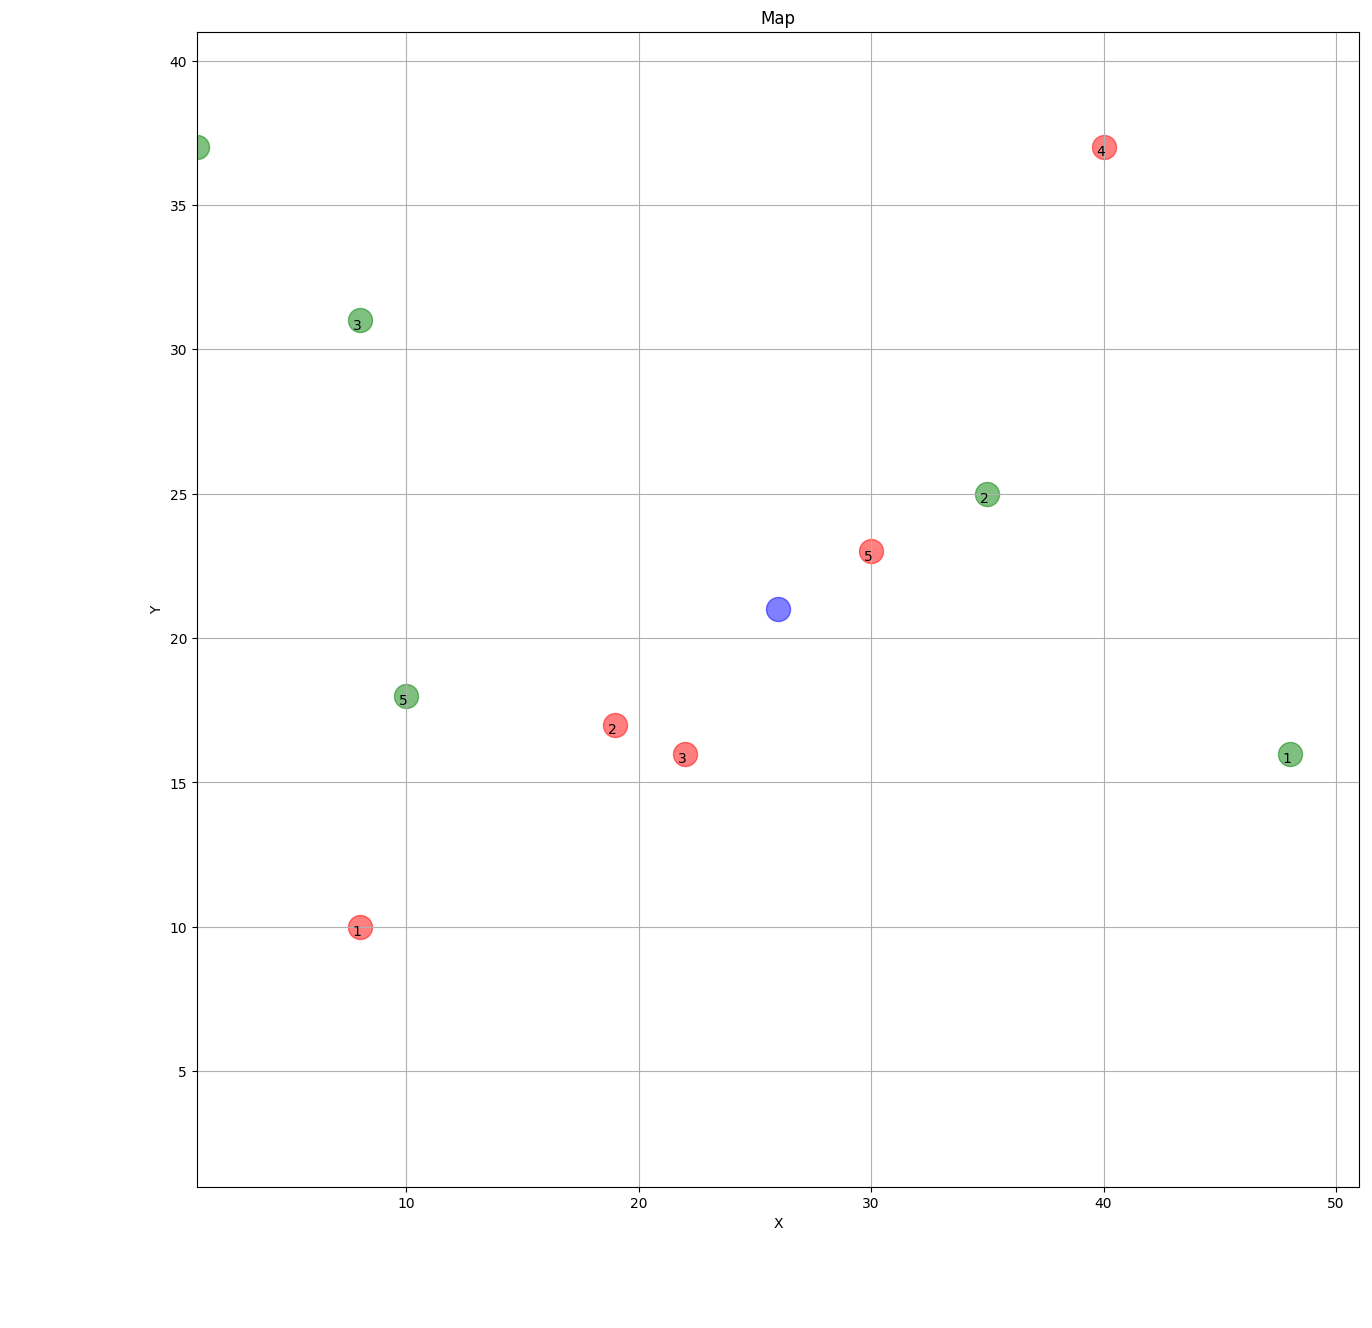

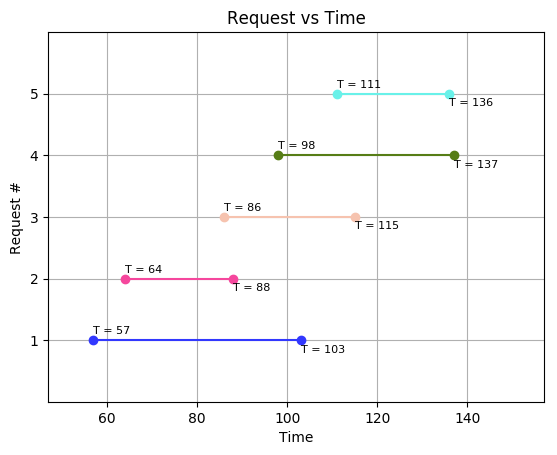

From ╲ To │ Depot    P_1    D_1    P_2    D_2    P_3    D_3    P_4    D_4    P_5    D_5
──────────┼────────────────────────────────────────────────────────────────────────────
Depot     │   0.0   29.0   27.0   11.0   13.0    9.0   28.0   30.0   41.0    6.0   19.0
P_1       │  29.0    0.0   46.0   18.0   42.0   20.0   21.0   59.0   34.0   35.0   10.0
D_1       │  27.0   46.0    0.0   30.0   22.0   26.0   55.0   29.0   68.0   25.0   40.0
P_2       │  11.0   18.0   30.0    0.0   24.0    4.0   25.0   41.0   38.0   17.0   10.0
D_2       │  13.0   42.0   22.0   24.0    0.0   22.0   33.0   17.0   46.0    7.0   32.0
P_3       │   9.0   20.0   26.0    4.0   22.0    0.0   29.0   39.0   42.0   15.0   14.0
D_3       │  28.0   21.0   55.0   25.0   33.0   29.0    0.0   38.0   13.0   30.0   15.0
P_4       │  30.0   59.0   29.0   41.0   17.0   39.0   38.0    0.0   39.0   24.0   49.0
D_4       │  41.0   34.0   68.0   38.0   46.0   42.0   13.0   39.0    0.0   43.0   28.0
P_5       │   6.0   35.0   25.0 

11×11 Named Array{Float64,2}
From ╲ To │ Depot    P_1    D_1    P_2  …    P_4    D_4    P_5    D_5
──────────┼──────────────────────────────────────────────────────────
Depot     │   0.0   29.0   27.0   11.0  …   30.0   41.0    6.0   19.0
P_1       │  29.0    0.0   46.0   18.0      59.0   34.0   35.0   10.0
D_1       │  27.0   46.0    0.0   30.0      29.0   68.0   25.0   40.0
P_2       │  11.0   18.0   30.0    0.0      41.0   38.0   17.0   10.0
D_2       │  13.0   42.0   22.0   24.0      17.0   46.0    7.0   32.0
P_3       │   9.0   20.0   26.0    4.0      39.0   42.0   15.0   14.0
D_3       │  28.0   21.0   55.0   25.0      38.0   13.0   30.0   15.0
P_4       │  30.0   59.0   29.0   41.0       0.0   39.0   24.0   49.0
D_4       │  41.0   34.0   68.0   38.0      39.0    0.0   43.0   28.0
P_5       │   6.0   35.0   25.0   17.0      24.0   43.0    0.0   25.0
D_5       │  19.0   10.0   40.0   10.0  …   49.0   28.0   25.0    0.0

In [115]:
requests, depot = genGrid(5,1)
nodes = getLocations(depot, requests)
dist_matrix = distance_matrix(nodes, length(requests))

In [116]:
# Function to Get the coordinates of all depot and pickup, drop locations of requests (in order of request)
# Can be modified to be called within distance matrix

function getLocations(depot, requests)
    nodes = []
    for d in depot             # Right now, considering only single depot.
        depot_node = d.cur_pos
        push!(nodes, depot_node)
    end

    for r in requests
        push!(nodes, r.pickup_pos)
        push!(nodes, r.dropoff_pos)
    end
    return nodes
end

getLocations (generic function with 1 method)

# Generating distance matrix 

In [117]:
# Generating distance matrix.
 
function distance_matrix(nodes, numReq)
    
    # Creating names for nodes
    numReq = length(requests)
    points = []
    i = 0
    push!(points,"Depot")
    for r in 1:numReq
        i = i+1
        pickup = string("P_",i)
        drop = string("D_",i)
        push!(points,pickup)
        push!(points,drop)
    end
    println(points)

    # Compute distance matrix for the Agencies
    pointA = nodes
    pointB = copy(nodes)

    nodeLen = length(nodes) # nodes include pickup, dropoff and depot

    D = zeros(nodeLen,nodeLen)

    for j = 1:nodeLen
            for i = 1:nodeLen
                D[i, j] = abs(pointA[j][1] - pointB[i][1]) + abs(pointA[j][2] - pointB[i][2])
            end
    end
    #println("Distance matrix : ",D)
    println("")

    dist_matrix =  NamedArray(D,(points,points),("From","To"))
    show(IOContext(STDOUT, displaysize=(2000, 2000)), dist_matrix)
    points
    return dist_matrix
end

distance_matrix (generic function with 1 method)

# Dummy Problem

### Make sure that the time window starts at T=0 + max(distance of depot frm pickup point)

In [91]:
vehicle = [:Cab1]

# Call function to assign time slots for each request

1-element Array{Symbol,1}:
 :Cab1

In [118]:
request = [:R1 :R2]
reqNum = length(request)
points = ["Depot"; "P1"; "D1"; "P2"; "D2"]

pickup = Dict(zip(request,[(1,9) (4,8)]))
drop = Dict(zip(request,[(8,8) (2,10)]))

pointA = [(0,0) (1,9) (8,8) (4,8) (2,10)]
pointB = copy(pointA)

D = zeros(5,5)
for j = 1:5
        for i = 1:5
            D[i, j] = abs(pointA[j][1] - pointB[i][1]) + abs(pointA[j][2] - pointB[i][2])
        end
end

#Distance matrix can be used as time matrix also
using NamedArrays
dist_matrix =  NamedArray(D,(points,points),("From","To"))
show(IOContext(STDOUT, displaysize=(2000, 2000)), dist_matrix)


5×5 Named Array{Float64,2}
From ╲ To │ Depot     P1     D1     P2     D2
──────────┼──────────────────────────────────
Depot     │   0.0   10.0   16.0   12.0   12.0
P1        │  10.0    0.0    8.0    4.0    2.0
D1        │  16.0    8.0    0.0    4.0    8.0
P2        │  12.0    4.0    4.0    0.0    4.0
D2        │  12.0    2.0    8.0    4.0    0.0

In [119]:
dist_matrix["P1","P2"]

4.0

In [120]:
# Time for 2 requests
pickup_time = Dict(zip(request,[40 50]))

# Calculate duration using distance matrix OR already done using Passenger info
duration = Dict(zip(request,[8 4]))
drop_time = Dict(zip(request,[48 54]))

avail = [1 1
         1 1 ] # availability of car1 car2 for req1, req2

2×2 Array{Int64,2}:
 1  1
 1  1

In [121]:
# Solving this version
using JuMP, Cbc
m = Model(solver = CbcSolver())

@variable(m, x[request,vehicle], Bin)   #Binary variable showing request served by vehicle
@variable(m, y[vehicle], Bin)           #Binary variable showing vehicle used
@variable(m, t_start[request] >= 0)    # Variable for service start time
@variable(m, t_end[request] >=0)       # Variable for service end time
@variable(m, t_service[request] >= 0)


@constraint(m, ServiceConstraint[i in request], sum(x[i,j] for j in vehicle) == 1)  # Each request is served once.
@constraint(m, StartTimeConstraint[i in request], t_start[i] == pickup_time[i])     # Start time = Pickup time
@constraint(m, DurationConstraint[i in request], t_service[i] == duration[i])       # Journey time for each request
@constraint(m, EndTimeConstraint[i in request], t_end[i] == drop_time[i])           # End time = Drop time

#The vehicle's end time + distance time = start time of next request


# if any request is served by vehicle then y[vehicle] = 1



@objective(m, Min, sum(x[i,j] for i in request, j in vehicle))

println(m)
solve(m)

println(getvalue(x[:]))
println(getvalue(t_start))

Min x[R1,Cab1] + x[R2,Cab1]
Subject to
 x[R1,Cab1] == 1
 x[R2,Cab1] == 1
 t_start[R1] == 40
 t_start[R2] == 50
 t_service[R1] == 8
 t_service[R2] == 4
 t_end[R1] == 48
 t_end[R2] == 54
 x[i,j] in {0,1} for all i in {R1,R2}, j in {Cab1}
 y[i] in {0,1} for all i in {Cab1}
 t_start[i] >= 0 for all i in {R1,R2}
 t_end[i] >= 0 for all i in {R1,R2}
 t_service[i] >= 0 for all i in {R1,R2}

[1.0, 1.0]
t_start: 1 dimensions:
[R1] = 40.0
[R2] = 50.0
